# Logistic regression

# Dataset:
German Credit

# Objective
Estimate default probabilities using logistic regression

# 1. Load Libraries and data

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Check how many records do we have


In [67]:
GC_df = pd.read_excel('GermanCredit.xlsx')
GC_df.head()

,Creditability,CreditAmount,DurationOfCreditInMonths
0,1,1049,18
1,1,2799,9
2,1,841,12
3,1,2122,12
4,1,2171,12


In [68]:
GC_df.shape

(1000, 3)

# 3. Plot Histogram for column 'CreditAmount'

<AxesSubplot:xlabel='CreditAmount', ylabel='Count'>

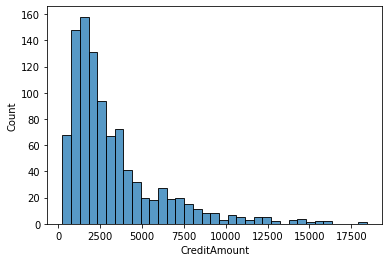

In [69]:
sns.histplot(GC_df.CreditAmount)

# 3b. Create creditability dataframe

In [70]:
cred_df = pd.DataFrame(GC_df.Creditability)
cred_df.head()

,Creditability
0,1
1,1
2,1
3,1
4,1


# 4. Concatenate the above 2 dataframes and give the total of Credibiliity0 and Credibiliity1

# 5. Plot Creditworthiness plot for Credibility == 0 and also ==1

c:\users\anjali mahato\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Creditability', ylabel='count'>

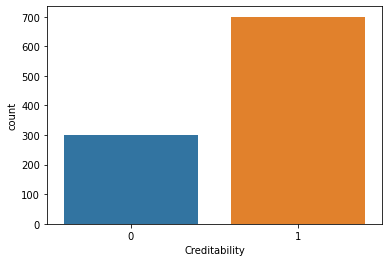

In [71]:
sns.countplot(GC_df.Creditability)

In [103]:
GC_df.Creditability.value_counts()

1    693
0    300
Name: Creditability, dtype: int64

# 6. Prepare input data for the model

In [72]:
# check for duplicate records

GC_df.duplicated().sum()

7

In [73]:
# dropping duplicates

GC_df.drop_duplicates(keep='first',inplace=True)
GC_df.shape

(993, 3)

In [74]:
# missing values

GC_df.isnull().sum().sum()

0

In [81]:
num_cols = GC_df.drop('Creditability', axis=1)

In [78]:
cat_cols = GC_df.Creditability

In [82]:
# scaling the independent variables

from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()

scaled_cols = mm.fit_transform(num_cols)

scaled_df = pd.DataFrame(scaled_cols, columns = num_cols.columns, index= num_cols.index)
scaled_df.head()

,CreditAmount,DurationOfCreditInMonths
0,0.043964,0.205882
1,0.140255,0.073529
2,0.032519,0.117647
3,0.103004,0.117647
4,0.105700,0.117647


In [87]:
# concatenating X and y

final_df = pd.concat([scaled_df,cat_cols], axis=1)
final_df.shape

(993, 3)

In [88]:
# preparing training and test data

from sklearn.model_selection import train_test_split

X = final_df.drop('Creditability',axis=1)
y = final_df.Creditability

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

# 7. Fit logistic regression model

In [89]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

# 8. Test accuracy calculation

In [90]:
y_pred = model.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.7286432160804021

# 9. Build a confusion matrix

<AxesSubplot:>

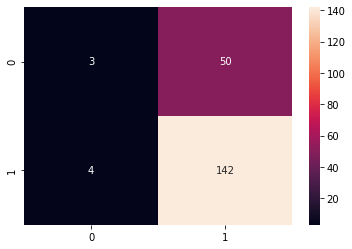

In [94]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt='d')

# 10.  Predicted Probability distribution Plots for Defaults and Non Defaults

In [111]:
pred_proba = pd.DataFrame(y_pred, columns=['Pred_Proba'])

In [112]:
pred_proba.Pred_Proba.value_counts()

1    192
0      7
Name: Pred_Proba, dtype: int64

c:\users\anjali mahato\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pred_Proba', ylabel='count'>

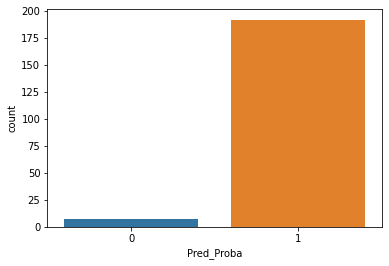

In [113]:
sns.countplot(pred_proba.Pred_Proba)